<p align="center"><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="260" height="110" /></p>
<br>
<center><h1><b>Project - Analysis on Facebook Utilization</h1></b></center>


---
# **Table of Contents**
---

1. [**Introduction**](#Section1)<br>
2. [**Problem Statement**](#Section2)<br>
3. [**Installing & Importing Libraries**](#Section3)<br>
  3.1 [**Installing Libraries**](#Section31)<br>
  3.2 [**Upgrading Libraries**](#Section32)<br>
  3.3 [**Importing Libraries**](#Section33)<br>
4. [**Data Acquisition & Description**](#Section4)<br>
5. [**Data Pre-Profiling**](#Section5)<br>
6. [**Data Pre-Processing**](#Section6)<br>
7. [**Data Post-Profiling**](#Section7)<br>
8. [**Exploratory Data Analysis**](#Section8)<br>
9. [**Summarization**](#Section9)</br>
  9.1 [**Conclusion**](#Section91)</br>
  9.2 [**Actionable Insights**](#Section91)</br>

---

<p align="center"><img src="https://chi2016.acm.org/wp/wp-content/uploads/2016/02/Facebook-06-2015-Blue.png" width=500></p>

---
<a name = Section1></a>
# **1. Introduction**
---

- Facebook is an American online **social media and networking service**, founded by Mark Zuckerberg in 2004.

- People stay connected with friends and family, interact and discover what's going on in the world.

- It has **2.85 billion monthly active users**, India contributes maximum among all countries.

- Available in 111 languages.

- Facebook is the **3rd most popular site in the world** next to
Google and YouTube.

- As of March 2021, it is ranked 7th in global internet usage.

---
<a name = Section2></a>
# **2. Problem Statement**
---

 - People from all over the world are using Facebook as a medium to express their feelings and what matters to them. 

 - With billions of users, lots of data are generated everyday.

 - A study of the **user behaviour** and **demographics** will help us understand the **distribution**, **correlation** and **trends**.

 - The aim of this report is to perform an **exploratory analysis** to identify any **underlying patterns** and acquire **meaningful insights**.

 - Analyzing these differences can help Facebook 
   - **Stay updated with latest technologies**
   - **Improve customer experience**
  

---
<a id = Section3></a>
# **3. Installing & Importing Libraries**
---

- This section is emphasised on installing and importing the necessary libraries that will be required.

### **Installing Libraries**

In [ ]:
!pip install -q datascience                                         
!pip install -q pandas-profiling                                    

     |████████████████████████████████| 69 kB 6.5 MB/s 


### **Upgrading Libraries**


In [ ]:
!pip install -q --upgrade pandas-profiling                          

### **Importing Libraries**



In [1]:
import pandas as pd                                                 
from pandas_profiling import ProfileReport   

import numpy as np  

import matplotlib.pyplot as plt                                     
import seaborn as sns                                              
%matplotlib inline

import scipy as sp                                                  

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---
- The dataset contains information about **Facebook utilization** of around **1 lakh people**.

<br>

|Id|Feature|Description|
|:--|:--|:--|
|01| userid                 | A numeric value uniquely identifying the user.|
|02| age                    | Age of the user in years.|
|03| dob_day                | Day part of the user's date of birth.|
|04| dob_year               | Year part of the user's date of birth.| 
|05| dob_month              | Month part of the user's date of birth.|
|06| gender                 | Gender of the user.| 
|07| tenure                 | Number of days since the user has been on FB.|
|08| friend_count           | Number of friends the user has.|
|09| friendships_initiated  | Number of friendships initiated by the user.|
|10| likes                  | Total number of posts liked by the user.|
|11| likes_received         | Total Number of likes received by user's posts.|
|12| mobile_likes           | Number of posts liked by the user through mobile app.|
|13| mobile_likes_received  | Number of likes received by user through mobile app.|
|14| www_likes              | Number of posts liked by the user through web.|
|15| www_likes_received     | Number of likes received by user  through web.| 

<br>

- The shape( ) function returns the size of the dataframe as rows x columns.
- The head( ) function is used to get the first 'n' rows. 

In [2]:
data = pd.read_csv(filepath_or_buffer = 'https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/facebook_data.csv')
print('Data Shape:', data.shape)
data.head()

Data Shape: (99003, 15)


,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


### **Data Description**

- Describe method gives some quick description out of the data like
 - count of variables
 - maximum, minimum and mean of numerical data
 - standard deviation
 - interquartile range

In [ ]:
data.describe()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,9.900300e+04,99003.000000,99003.000000,99003.000000,99003.000000,99001.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000
mean,1.597045e+06,37.280224,14.530408,1975.719776,6.283365,537.887375,196.350787,107.452471,156.078785,142.689363,106.116300,84.120491,49.962425,58.568831
std,3.440592e+05,22.589748,9.015606,22.589748,3.529672,457.649874,387.304229,188.786951,572.280681,1387.919613,445.252985,839.889444,285.560152,601.416348
min,1.000008e+06,13.000000,1.000000,1900.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.298806e+06,20.000000,7.000000,1963.000000,3.000000,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.596148e+06,28.000000,14.000000,1985.000000,6.000000,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,1.895744e+06,50.000000,22.000000,1993.000000,9.000000,675.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000
max,2.193542e+06,113.000000,31.000000,2000.000000,12.000000,3139.000000,4923.000000,4144.000000,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000


#### **Observation**

- The mean age of users is 37, which means target is young population.
- Mobile usage of Facebook is almost twice the web usage.
- Many columns with zero values, chances of inactive accounts.

### **Data Information**
- The info( ) function gives details about the columns i.e. 
 - Column name
 - Total count of each variable
 - Dtype
 - is null or not

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 99003 non-null  int64  
 1   age                    99003 non-null  int64  
 2   dob_day                99003 non-null  int64  
 3   dob_year               99003 non-null  int64  
 4   dob_month              99003 non-null  int64  
 5   gender                 98828 non-null  object 
 6   tenure                 99001 non-null  float64
 7   friend_count           99003 non-null  int64  
 8   friendships_initiated  99003 non-null  int64  
 9   likes                  99003 non-null  int64  
 10  likes_received         99003 non-null  int64  
 11  mobile_likes           99003 non-null  int64  
 12  mobile_likes_received  99003 non-null  int64  
 13  www_likes              99003 non-null  int64  
 14  www_likes_received     99003 non-null  int64  
 15  ag

#### **Observation**

- Contains 1 categorical and 14 numeric variables.
- There are **missing** values present in **Gender** and **Tenure**. 

Correlation matrix shows the coefficient of relation between variables in the data as a range of values from -1 to 1.


In [ ]:
data.corr()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
userid,1.000000,-0.007265,-0.000839,0.007265,0.002924,-0.003446,-0.001314,-0.001591,-0.002875,0.001526,-0.004868,0.001753,0.001828,0.001074
age,-0.007265,1.000000,0.035035,-1.000000,0.025167,0.462742,-0.027407,-0.058059,-0.013009,-0.022570,-0.026715,-0.024248,0.015585,-0.018224
dob_day,-0.000839,0.035035,1.000000,-0.035035,0.129443,0.041855,0.021961,0.022999,0.015980,0.001367,0.014541,0.000497,0.009353,0.002460
dob_year,0.007265,-1.000000,-0.035035,1.000000,-0.025167,-0.462742,0.027407,0.058059,0.013009,0.022570,0.026715,0.024248,-0.015585,0.018224
dob_month,0.002924,0.025167,0.129443,-0.025167,1.000000,0.029446,0.019804,0.020075,0.014147,0.006495,0.010400,0.006435,0.012136,0.006003
tenure,-0.003446,0.462742,0.041855,-0.462742,0.029446,1.000000,0.166256,0.133505,0.057132,0.027745,0.028052,0.023971,0.070757,0.030553
friend_count,-0.001314,-0.027407,0.021961,0.027407,0.019804,0.166256,1.000000,0.825850,0.298017,0.236463,0.235656,0.232701,0.229803,0.220727
friendships_initiated,-0.001591,-0.058059,0.022999,0.058059,0.020075,0.133505,0.825850,1.000000,0.285592,0.175131,0.229808,0.173804,0.214022,0.161439
likes,-0.002875,-0.013009,0.015980,0.013009,0.014147,0.057132,0.298017,0.285592,1.000000,0.327376,0.871652,0.329258,0.644960,0.295687
likes_received,0.001526,-0.022570,0.001367,0.022570,0.006495,0.027745,0.236463,0.175131,0.327376,1.000000,0.256998,0.973679,0.255365,0.947990


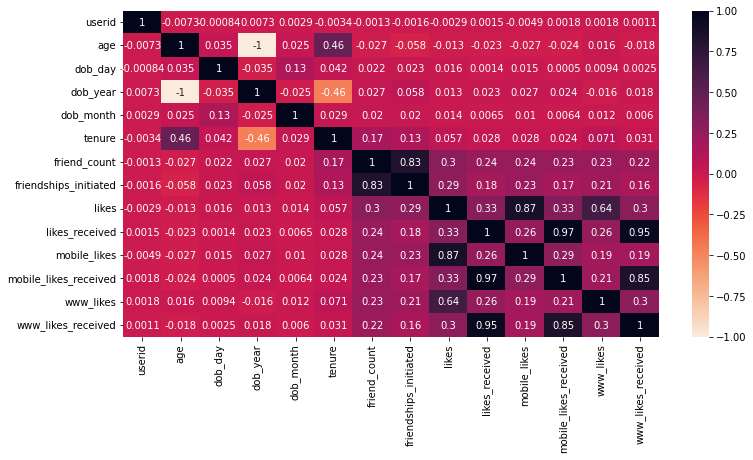

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(data=data.corr(), annot=True, cmap='rocket_r')


**Positive correlation**

- Age and tenure 

- Friend count and tenure

- Friendships initiated and friend count

- Likes given and received i.e, mobile vs web

---
<a name = Section5></a>
# **5. Data Pre-Profiling**
---

- Perform pandas profiling and get a report with some observations about the data.

In [ ]:
profile = ProfileReport(df = data)
profile.to_file(output_file = 'Pre Profiling Report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

---
<a name = Section6></a>
# **6. Data Pre-Processing**
---


 Unnecessary attribute - **userid** has been dropped.

In [ ]:
data.drop(labels=['userid'], axis=1, inplace=True)

Handling missing data

  - **Gender** - 175

  - **Tenure** - 2

Null values in **gender** column are replaced with **mode**. In case of categories with few unique variables, most occuring value should be ideal.

**Tenure** says about the duration of Facebook usage and hence is replaced with its **median**.
  

In [ ]:
data['gender'].fillna(data['gender'].mode()[0], inplace=True)


In [ ]:
data['tenure'].fillna(data['tenure'].median(), inplace=True)

In [ ]:
data.isna().sum()

age                      0
dob_day                  0
dob_year                 0
dob_month                0
gender                   0
tenure                   0
friend_count             0
friendships_initiated    0
likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
www_likes                0
www_likes_received       0
age_group                0
dtype: int64

Data manipulation over unstructured data - **age**

- Age attribute has been categorized further into subgroups for better understanding. 

In [5]:
conditions = [
    (data['age'] <= 20),
    (data['age'] > 20) & (data['age'] <= 30),
    (data['age'] > 30) & (data['age'] <= 40),
    (data['age'] > 40) & (data['age'] <= 50),
    (data['age'] > 50) & (data['age'] <= 60),
    (data['age'] > 60) & (data['age'] <= 70),
    (data['age'] > 70) & (data['age'] <= 80),
    (data['age'] > 80) & (data['age'] <= 90),
    (data['age'] > 90) & (data['age'] <= 100),
    (data['age'] > 100)
    ]

values = ['< 20', '20 - 30', '30 - 40', '40 - 50', '50 - 60', '60 - 70', '70 - 80', '80 - 90', '90 - 100', '> 100']

data['age_group'] = np.select(conditions, values)
data[['age_group']].tail()

,age_group
98998,60 - 70
98999,< 20
99000,< 20
99001,20 - 30
99002,30 - 40


---
<a name = Section7></a>
# **7. Data Post-Profiling**
---

- Post profiling generates a report about the data after its manipulation.

In [ ]:
profile = ProfileReport(df = data)
profile.to_file(output_file = 'Post Profiling Report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

---
<a name = Section8></a>
# **8. Exploratory Data Analysis**
---
It is all about questions and answering them in the process of performing investigations on data in order to discover patterns, spot anomalies and to check assumptions with the help of and graphical representations.

### **Users - Age Group**

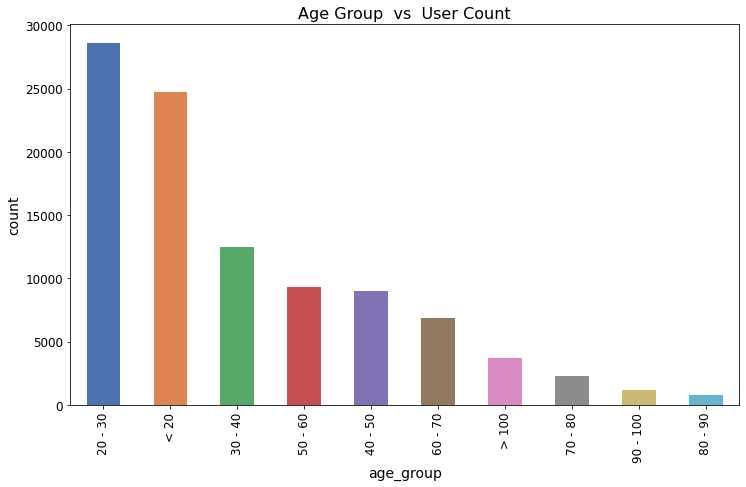

In [ ]:
plt.figure(figsize=(12,7))
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel(xlabel='age_group', size=14)
plt.ylabel(ylabel='count', size=14)
plt.title(label='Age Group  vs  User Count', size=16)
color=sns.color_palette('deep')
data.age_group.value_counts().plot.bar(color=color)

#### **Observation**

- People in the **age group** of **20-30** are heavy users of Facebook.

### **Most birthdays on 1st of January**

In [ ]:
col = ["dob_day","dob_month"]
data['date'] = data[col].apply(lambda x: '/'.join(x.values.astype(str)), axis="columns")
date_count = data.pivot_table(index = ['date'], aggfunc ='size')
date_count

date
1/1     4032
1/10     335
1/11     306
1/12     327
1/2      426
        ... 
9/5      233
9/6      262
9/7      261
9/8      250
9/9      342
Length: 366, dtype: int64

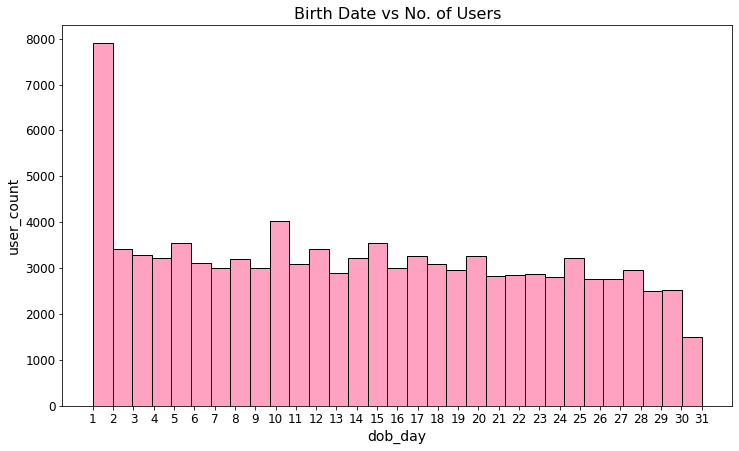

In [ ]:
plt.figure(figsize=(12,7))
plt.xlabel('dob_day', size=14)
plt.ylabel('user_count', size=14)
plt.title('Birth Date vs No. of Users', size=16)
plt.xticks(ticks=np.arange(1,32), size=12)
plt.yticks(size=12)
sns.histplot(data=data, x='dob_day', bins=31, color='#FF82AB', legend='full')

#### **Observation**

- Many people have set their birthdays to 1st of January by default.
- Data could be unreal.

### **Users - Gender**

In [ ]:
data['gender'].value_counts()

male      58749
female    40254
Name: gender, dtype: int64

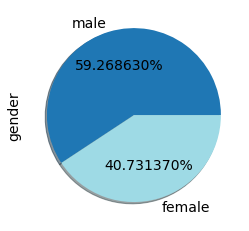

In [ ]:
plt.ylabel(ylabel='gender', size=14)
data.gender.value_counts().plot(kind = 'pie', cmap='tab20', fontsize=14, shadow = True,  autopct='%2f%%')

#### **Observation**

- There are **20%** more **male** users as compared to females.

### **Gender vs Tenure**

In [ ]:
data.groupby('gender').tenure.sum()

gender
female    23637151.0
male      29298972.0
Name: tenure, dtype: float64

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 <a list of 9 Text major ticklabel objects>)

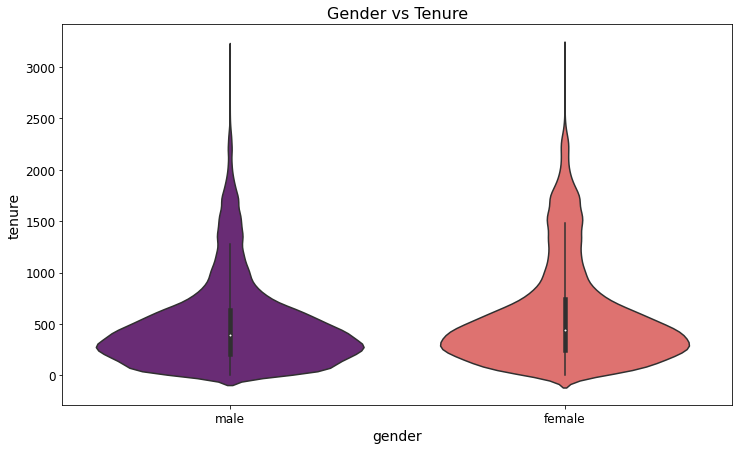

In [32]:
plt.figure(figsize=(12,7))
sns.violinplot(x='gender', y='tenure', data=data, palette='magma')
plt.xlabel('gender', size=14)
plt.ylabel('tenure', size=14)
plt.title('Gender vs Tenure', size=16)
plt.xticks(size=12)
plt.yticks(size=12)

#### **Observation**

- Men have been using Facebook for a longer duration than women.

- The maximum users' tenure is less than a year.

### **Gender vs Friend count**

In [ ]:
data.groupby('gender').friend_count.sum()

gender
female    9740258
male      9699059
Name: friend_count, dtype: int64


(array([   0.,  200.,  400.,  600.,  800., 1000.]),
 <a list of 6 Text major ticklabel objects>)

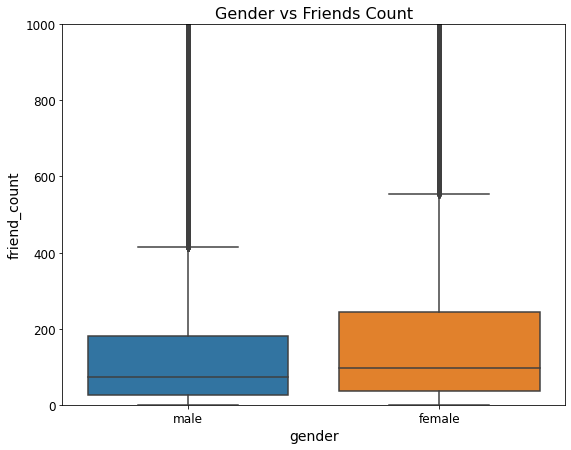

In [33]:
plt.figure(figsize=(9,7))
sns.boxplot(data=data,x='gender',y='friend_count')
plt.ylim((0,1000))
plt.title('Gender vs Friends Count', size =16)
plt.xlabel('gender', size=14)
plt.ylabel('friend_countS', size=14)
plt.xticks(size=12)
plt.yticks(size=12)

#### **Observation**

- Females have more friends than males in all cases.

### **Trends in Friendships and Likes based on Age Group**

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 <a list of 10 Text major ticklabel objects>)

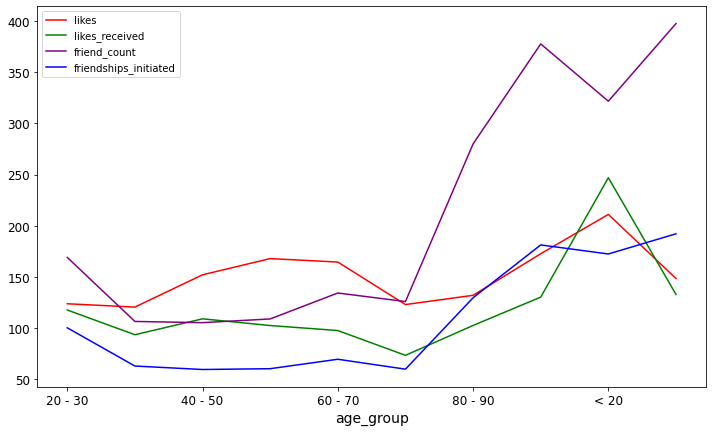

In [35]:
plt.figure(figsize=(12,7))
plt.legend(labels=('likes','likes_received','friend_count','friendships_initiated'),fontsize=12)
data.groupby(by=['age_group'])['likes'].mean().plot.line(color='red',legend=True)
data.groupby(by=['age_group'])['likes_received'].mean().plot.line(color='green',legend=True)
data.groupby(by=['age_group'])['friend_count'].mean().plot.line(color='purple',legend=True)
data.groupby(by=['age_group'])['friendships_initiated'].mean().plot.line(color='blue',legend=True)
plt.xlabel('age_group', size=14)
plt.xticks(size=12)
plt.yticks(size=12)

#### **Observation**

- The number of friends, friendships, likes given and received by teenagers are more than any other age group of people

### **Gender vs Friendship Initiated**

In [ ]:
data.groupby('gender').friendships_initiated.sum()

gender
female    4584894
male      6037023
Name: friendships_initiated, dtype: int64

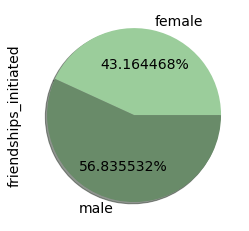

In [3]:
plt.ylabel(ylabel='friendships_initiated', size=14)
my_colors2 = ['#9BCD9B','#698B69']
data.groupby('gender').friendships_initiated.sum().plot.pie(colors=my_colors2, shadow = True, fontsize=14, autopct='%2f%%')

#### **Observation**

- Men are 15% more likely to initiate friendships than women.

### **Mobile vs Web usage based on Age group**

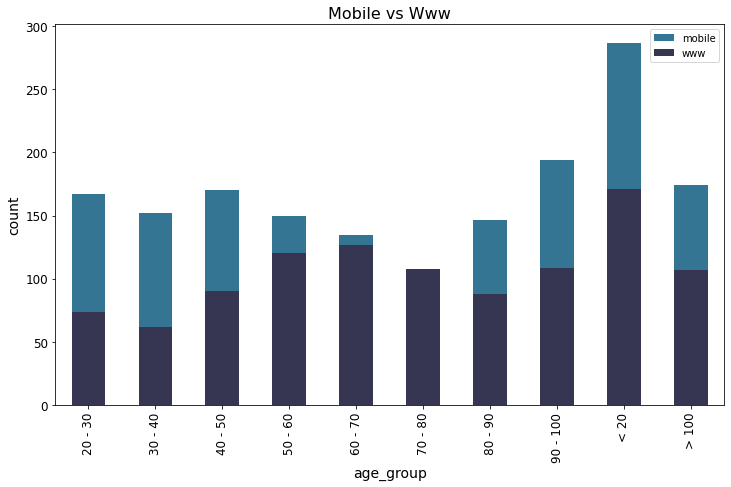

In [38]:
plt.figure(figsize=(12,7))
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel('age_group',size=14)
plt.ylabel('count', size=14)
plt.title('Mobile vs Www', size=16)
data['mobile']= data['mobile_likes']+data['mobile_likes_received']
data['www']= data['www_likes']+data['www_likes_received']
data.groupby(by=['age_group'])['mobile'].mean().plot.bar(color='#347593', legend=True)
data.groupby(by=['age_group'])['www'].mean().plot.bar(color='#363552',legend=True)

#### **Observation**

- It can be observed that users of all age groups prefer to use Facebook on their mobile than on web.

- Also people under 20 are most active in terms of likes and likes received.

### **Age Group vs Likes Received based on Gender**

(array([  0., 100., 200., 300., 400., 500., 600.]),
 <a list of 7 Text major ticklabel objects>)

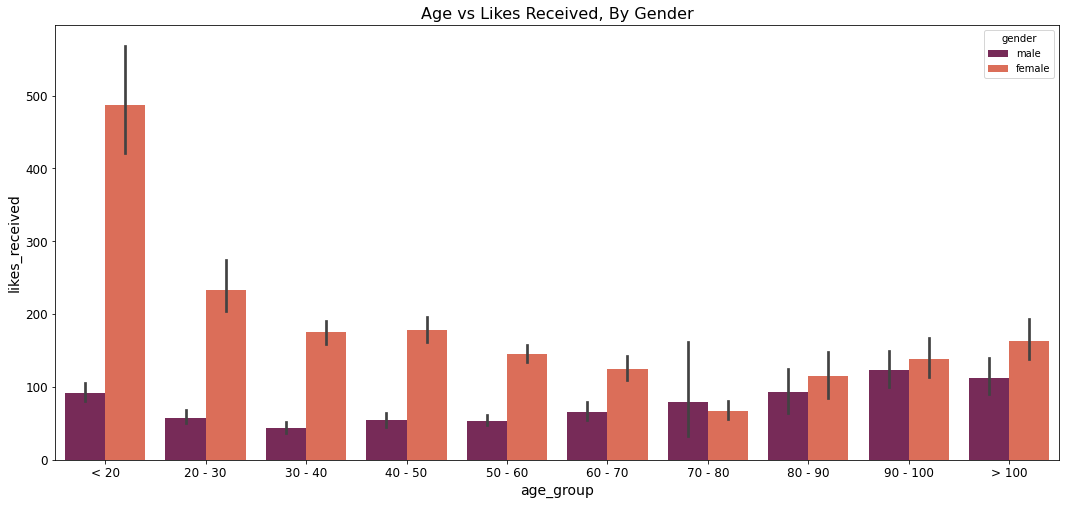

In [25]:
plt.figure(figsize=(18,8))
plt.xlabel('age_group', size=14)
plt.ylabel('likes_received', size=14)
plt.title('Age vs Likes Received, By Gender', size=16)
sns.barplot(x='age_group', y='likes_received', hue='gender', data=data, palette='rocket')
plt.xticks(size=12)
plt.yticks(size=12)

#### **Observation**

- When users are further studied based on age groups, females in the age group 20 - 30 receive more likes even when compared than men of the same age group.


### **Identifying Idle Accounts**

In [ ]:
find_idle = data.iloc[:,6:]
find_idle

,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group
0,266.0,0,0,0,0,0,0,0,0,< 20
1,6.0,0,0,0,0,0,0,0,0,< 20
2,13.0,0,0,0,0,0,0,0,0,< 20
3,93.0,0,0,0,0,0,0,0,0,< 20
4,82.0,0,0,0,0,0,0,0,0,< 20
...,...,...,...,...,...,...,...,...,...,...
98998,541.0,2118,341,3996,18089,3505,11887,491,6202,60 - 70
98999,21.0,1968,1720,4401,13412,4399,10592,2,2820,< 20
99000,111.0,2002,1524,11959,12554,11959,11462,0,1092,< 20
99001,416.0,2560,185,4506,6516,4506,5760,0,756,20 - 30


In [ ]:
idle_accounts = find_idle[(find_idle['friend_count'] == 0) & (find_idle['friendships_initiated'] == 0) & (find_idle['likes'] == 0) & (find_idle['likes_received'] == 0) & (find_idle['mobile_likes'] == 0) & (find_idle['mobile_likes_received'] == 0) & (find_idle['www_likes'] == 0) & (find_idle['www_likes_received'] == 0)].shape
idle_accounts

(1664, 10)

In [ ]:
idle = find_idle[(find_idle['tenure'] == 0) & (find_idle['friend_count'] == 0) & (find_idle['friendships_initiated'] == 0) & (find_idle['likes'] == 0) & (find_idle['likes_received'] == 0) & (find_idle['mobile_likes'] == 0) & (find_idle['mobile_likes_received'] == 0) & (find_idle['www_likes'] == 0) & (find_idle['www_likes_received'] == 0)].shape
idle

(33, 10)

#### **Observation**

- Identified 1664 accounts, without initiating friendships & friend count is zero.

- No likes given or received but have been in use for some duration

- Out of this, 33 accounts left inactive by users right after creation.

### **Friend Count vs Tenure - Gender**

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 <a list of 9 Text major ticklabel objects>)

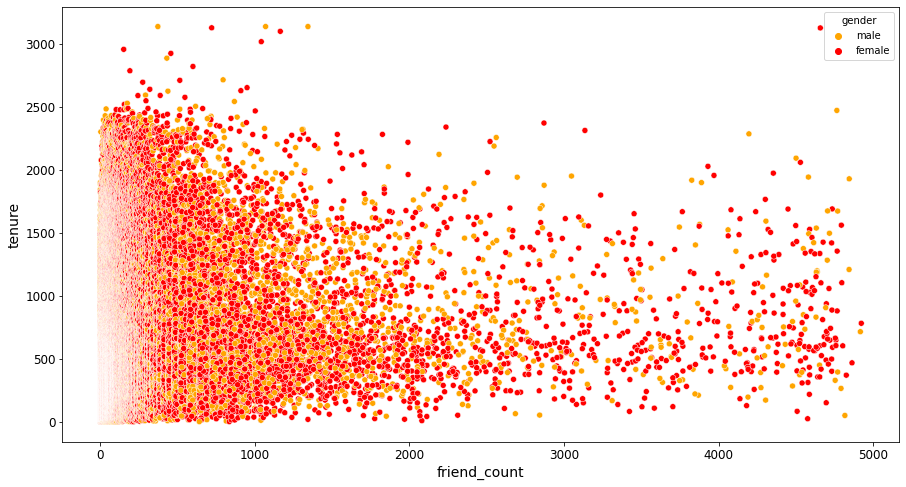

In [39]:
plt.figure(figsize=(15,8))
#plt.ylim(0,12000)
plt.xlabel('friend_count', size=14)
plt.ylabel('tenure', size=14)
sns.scatterplot(x='friend_count', y='tenure', hue='gender', data=data, palette=['orange','red'])
plt.xticks(size=12)
plt.yticks(size=12)

 #### **Observation**
 
 - Female are using for a longer duration.

 - Friend count does not depend upon tenure.

 - Women have made more friends than men in short period of time.

---
<a name = Section9></a>
# **9. Summarization**
---

<a name = Section91></a>
### **9.1 Conclusion**

- Age group of 20 - 30  are most active on Facebook.

- There are more male users than females.
- Users prefer to use mobile more then web irrespective of age.
- Women especially in age group 20-30 receive more likes on posts than men.
- Men initiate more friendships than women.
- Females have made more friends than male in short period of time.
- 1664 users have almost idle accounts, 33 completely not used.

<a name = Section92></a>
### **9.2 Actionable Insights**

- Providing content for all age groups to increase overall user engagement.

- Advertising female oriented products can help increase the count.
- Since all age groups prefer mobile usage, improve mobile application and keep it user friendly all the time.
- Introduce gaming to keep users connected.
- Suggestion of people  who share a common interest or passion.
